This file provides LSTM neural network for my Master’s Thesis.

The main concept: 
We will explore Bitcoin price prediction depending on the crisis. The hypothesis is whether we can train the neural network at the time when there was no crisis and what results it will give at the time when there is a crisis.

We distinguish three periods:
1. The shale crisis of 2014
2. Covid-19 crisis
3. Non-crisis data


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datetime import timezone
import datetime


from scipy import stats
import matplotlib as mpl
import seaborn as sns

import statsmodels.api as sm
import warnings
from itertools import product
# from datetime import datetime
import datetime

# Importing the Keras libraries and packages
from keras.models import Sequential
from keras.layers import Dense
from sklearn.preprocessing import MinMaxScaler
from keras.layers import LSTM
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
warnings.filterwarnings('ignore')
plt.style.use('seaborn-poster')

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm
Using TensorFlow backend.


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [ ]:
df = pd.read_csv("/content/drive/My Drive/bitstampUSD_1-min_data_2012-01-01_to_2020-04-22.csv")

## Делаем три сета

In [ ]:
df

,Timestamp,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price
0,1325317920,4.39,4.39,4.39,4.39,0.455581,2.000000,4.390000
1,1325317980,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1325318040,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1325318100,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1325318160,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
4363452,1587513360,6847.97,6856.35,6847.97,6856.35,0.125174,858.128697,6855.498790
4363453,1587513420,6850.23,6856.13,6850.23,6850.89,1.224777,8396.781459,6855.763449
4363454,1587513480,6846.50,6857.45,6846.02,6857.45,7.089168,48533.089069,6846.090966
4363455,1587513540,6854.18,6854.98,6854.18,6854.98,0.012231,83.831604,6854.195090


In [ ]:
df['date'] = pd.to_datetime(df['Timestamp'],unit='s').dt.date
group = df.groupby('date')
Real_Price = group['Weighted_Price'].mean()

In [ ]:
Real_Price

date
2011-12-31       4.471603
2012-01-01       4.806667
2012-01-02       5.000000
2012-01-03       5.252500
2012-01-04       5.208159
                 ...     
2020-04-18    7153.927559
2020-04-19    7166.968470
2020-04-20    7050.526233
2020-04-21    6867.155476
2020-04-22    6850.600000
Name: Weighted_Price, Length: 3033, dtype: float64

In [ ]:
# df1.loc[(df2 > 0) & (df2 < 5)]
df_1 = Real_Price.loc[(Real_Price.index >= datetime.date(2014,12,1)) & (Real_Price.index <= datetime.date(2015,12,31))]
df_2 = Real_Price.loc[(Real_Price.index >= datetime.date(2018,6,1)) & (Real_Price.index <= datetime.date(2019,6,1))]
df_3 = Real_Price.loc[(Real_Price.index >= datetime.date(2020,3,11)) & (Real_Price.index <= datetime.date(2020,4,22))]

In [ ]:
df_2

date
2018-06-01    7480.842998
2018-06-02    7597.067234
2018-06-03    7690.580575
2018-06-04    7575.547691
2018-06-05    7491.558552
                 ...     
2019-05-28    8727.337766
2019-05-29    8648.244324
2019-05-30    8632.743964
2019-05-31    8351.777836
2019-06-01    8543.924060
Name: Weighted_Price, Length: 366, dtype: float64

In [ ]:
def split_df(training_data):
    rows = len(training_data)
    split_factor = 0.8
    training = training_data[0:int(rows * split_factor)]
    validation = training_data[int(rows * split_factor):]
    return (training, validation)

In [ ]:
train_1 = split_df(df_1)[0]
test_1 = split_df(df_1)[1]

train_2 = split_df(df_2)[0]
test_2 = split_df(df_2)[1]

train_3 = split_df(df_3)[0]
test_3 = split_df(df_3)[1]

In [ ]:
test_1

date
2015-10-14    251.521353
2015-10-15    254.346742
2015-10-16    259.691409
2015-10-17    268.374826
2015-10-18    264.968275
                 ...    
2015-12-27    419.255909
2015-12-28    424.158893
2015-12-29    425.209743
2015-12-30    429.367697
2015-12-31    426.384454
Name: Weighted_Price, Length: 79, dtype: float64

## Calculatind for first set




In [ ]:
training_set = train_1.values
training_set = np.reshape(training_set, (len(training_set), 1))
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler()
training_set = sc.fit_transform(training_set)
X_train = training_set[0:len(training_set)-1]
y_train = training_set[1:len(training_set)]
X_train = np.reshape(X_train, (len(X_train), 1, 1))

Epoch 1/100
313/313 [==============================] - 0s 1ms/step - loss: 0.5892
Epoch 2/100
313/313 [==============================] - 0s 328us/step - loss: 0.3854
Epoch 3/100
313/313 [==============================] - 0s 359us/step - loss: 0.2483
Epoch 4/100
313/313 [==============================] - 0s 332us/step - loss: 0.1584
Epoch 5/100
313/313 [==============================] - 0s 365us/step - loss: 0.1018
Epoch 6/100
313/313 [==============================] - 0s 310us/step - loss: 0.0675
Epoch 7/100
313/313 [==============================] - 0s 352us/step - loss: 0.0480
Epoch 8/100
313/313 [==============================] - 0s 323us/step - loss: 0.0376
Epoch 9/100
313/313 [==============================] - 0s 313us/step - loss: 0.0324
Epoch 10/100
313/313 [==============================] - 0s 302us/step - loss: 0.0300
Epoch 11/100
313/313 [==============================] - 0s 319us/step - loss: 0.0288
Epoch 12/100
313/313 [==============================] - 0s 315us/step - loss

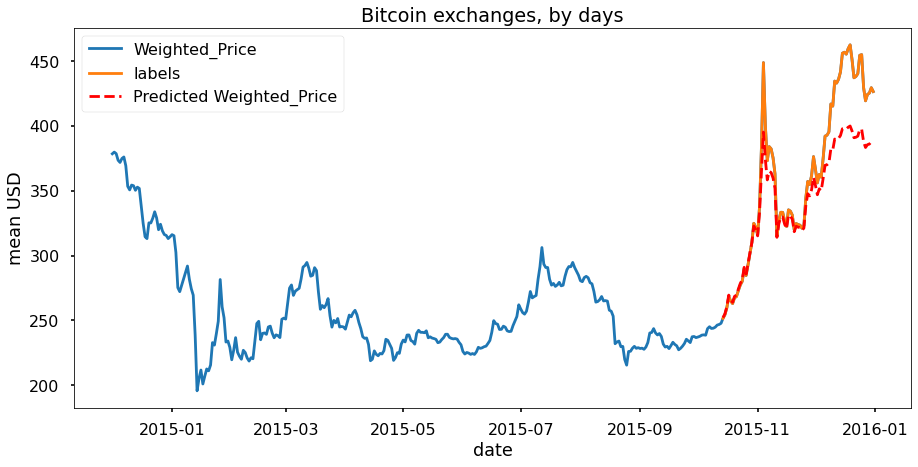

In [ ]:
# Importing the Keras libraries and packages
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM

# Initialising the RNN
regressor = Sequential()

# Adding the input layer and the LSTM layer
regressor.add(LSTM(units = 4, activation = 'sigmoid', input_shape = (None, 1)))

# Adding the output layer
regressor.add(Dense(units = 1))

# Compiling the RNN
regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')

# Fitting the RNN to the Training set
regressor.fit(X_train, y_train, batch_size = 5, epochs = 100)


test_set = test_1.values
inputs = np.reshape(test_set, (len(test_set), 1))
inputs = sc.transform(inputs)
inputs = np.reshape(inputs, (len(inputs), 1, 1))
predicted_BTC_price = regressor.predict(inputs)
predicted_BTC_price = sc.inverse_transform(predicted_BTC_price)


frame = {'labels': test_1}
result = pd.DataFrame(frame)
result['predict'] = predicted_BTC_price
print(result)


plt.figure(figsize=(15,7))
df_1.plot()
result.labels.plot()
result.predict.plot(color='r', ls='--', label='Predicted Weighted_Price')
plt.legend()
plt.title('Bitcoin exchanges, by days')
plt.ylabel('mean USD')
plt.show()


In [ ]:


#Calculate metrics
frame = {'labels': test_1}
result = pd.DataFrame(frame)
result['predict'] = predicted_BTC_price
result['predict'] = result.predict.astype(np.float64)
result['labels'] = result.labels.astype(np.float64)
print(result)


print('METRICS')
r2_score = r2_score(result['labels'],result['predict'])
print( f'r2_score {r2_score}')
mean_absolute_error = mean_absolute_error(result['labels'],result['predict'])
print(f'mean_absolute_error {mean_absolute_error}')
mean_squared_error = mean_squared_error(result['labels'],result['predict'], squared=False)
print(f'root mean_squared_error {mean_squared_error}')


# print(r2_score(result['labels'],result['predict']))



                labels     predict
date                              
2015-10-14  251.521353  252.109970
2015-10-15  254.346742  255.042618
2015-10-16  259.691409  260.572083
2015-10-17  268.374826  269.482483
2015-10-18  264.968275  265.999786
...                ...         ...
2015-12-27  419.255909  383.263153
2015-12-28  424.158893  385.443115
2015-12-29  425.209743  385.899689
2015-12-30  429.367697  387.670074
2015-12-31  426.384454  386.405701

[79 rows x 2 columns]
METRICS
r2_score 0.7953390270523751
mean_absolute_error 19.17539838860819
root mean_squared_error 28.101879278860082


## Calculatind for second set

Epoch 1/100
291/291 [==============================] - 0s 1ms/step - loss: 0.1921
Epoch 2/100
291/291 [==============================] - 0s 304us/step - loss: 0.1148
Epoch 3/100
291/291 [==============================] - 0s 317us/step - loss: 0.0788
Epoch 4/100
291/291 [==============================] - 0s 311us/step - loss: 0.0645
Epoch 5/100
291/291 [==============================] - 0s 324us/step - loss: 0.0590
Epoch 6/100
291/291 [==============================] - 0s 321us/step - loss: 0.0564
Epoch 7/100
291/291 [==============================] - 0s 337us/step - loss: 0.0545
Epoch 8/100
291/291 [==============================] - 0s 334us/step - loss: 0.0527
Epoch 9/100
291/291 [==============================] - 0s 428us/step - loss: 0.0509
Epoch 10/100
291/291 [==============================] - 0s 435us/step - loss: 0.0490
Epoch 11/100
291/291 [==============================] - 0s 338us/step - loss: 0.0471
Epoch 12/100
291/291 [==============================] - 0s 359us/step - loss

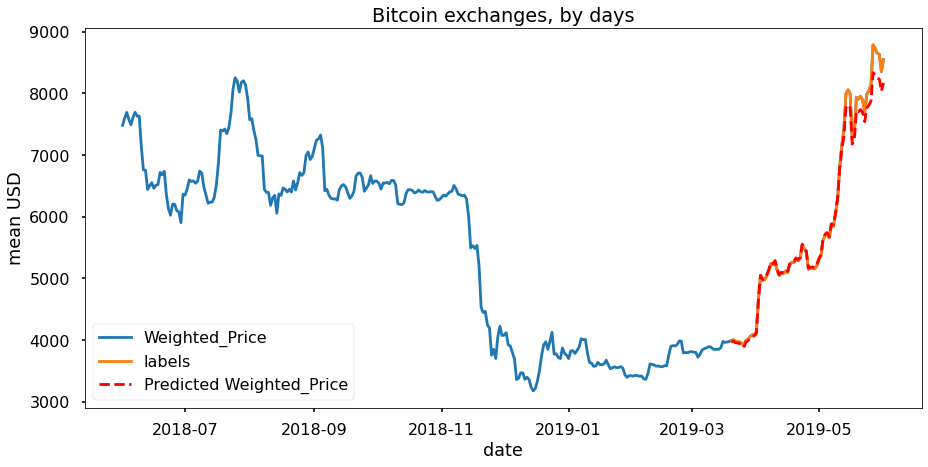

In [ ]:
training_set = train_2.values
training_set = np.reshape(training_set, (len(training_set), 1))
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler()
training_set = sc.fit_transform(training_set)
X_train = training_set[0:len(training_set)-1]
y_train = training_set[1:len(training_set)]
X_train = np.reshape(X_train, (len(X_train), 1, 1))


# Initialising the RNN
regressor = Sequential()

# Adding the input layer and the LSTM layer
regressor.add(LSTM(units = 4, activation = 'sigmoid', input_shape = (None, 1)))

# Adding the output layer
regressor.add(Dense(units = 1))

# Compiling the RNN
regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')

# Fitting the RNN to the Training set
regressor.fit(X_train, y_train, batch_size = 5, epochs = 100)


test_set = test_2.values
inputs = np.reshape(test_set, (len(test_set), 1))
inputs = sc.transform(inputs)
inputs = np.reshape(inputs, (len(inputs), 1, 1))
predicted_BTC_price = regressor.predict(inputs)
predicted_BTC_price = sc.inverse_transform(predicted_BTC_price)


frame = {'labels': test_2}
result = pd.DataFrame(frame)
result['predict'] = predicted_BTC_price
print(result)


plt.figure(figsize=(15,7))
df_2.plot()
result.labels.plot()
result.predict.plot(color='r', ls='--', label='Predicted Weighted_Price')
plt.legend()
plt.title('Bitcoin exchanges, by days')
plt.ylabel('mean USD')
plt.show()


In [ ]:
#Calculate metrics
frame = {'labels': test_2}
result = pd.DataFrame(frame)
result['predict'] = predicted_BTC_price
result['predict'] = result.predict.astype(np.float64)
result['labels'] = result.labels.astype(np.float64)
print(result)


print('METRICS')
r2_score = r2_score(result['labels'],result['predict'])
print( f'r2_score {r2_score}')
mean_absolute_error = mean_absolute_error(result['labels'],result['predict'])
print(f'mean_absolute_error {mean_absolute_error}')
mean_squared_error = mean_squared_error(result['labels'],result['predict'], squared=False)
print(f'root mean_squared_error {mean_squared_error}')

                 labels      predict
date                                
2019-03-20  3995.972001  3971.964844
2019-03-21  4005.272133  3981.577637
2019-03-22  3981.800272  3957.319092
2019-03-23  3980.326499  3955.797119
2019-03-24  3968.462451  3943.540039
...                 ...          ...
2019-05-28  8727.337766  8295.363281
2019-05-29  8648.244324  8241.744141
2019-05-30  8632.743964  8231.144531
2019-05-31  8351.777836  8033.801270
2019-06-01  8543.924060  8169.828125

[74 rows x 2 columns]
METRICS
r2_score 0.9905403157566305
mean_absolute_error 83.08763958013564
root mean_squared_error 144.48127078335122


In [ ]:
regressor.summary()

## ВCalculatind for third set

Epoch 1/100
33/33 [==============================] - 0s 11ms/step - loss: 0.3276
Epoch 2/100
33/33 [==============================] - 0s 619us/step - loss: 0.3064
Epoch 3/100
33/33 [==============================] - 0s 577us/step - loss: 0.2868
Epoch 4/100
33/33 [==============================] - 0s 447us/step - loss: 0.2678
Epoch 5/100
33/33 [==============================] - 0s 534us/step - loss: 0.2501
Epoch 6/100
33/33 [==============================] - 0s 606us/step - loss: 0.2332
Epoch 7/100
33/33 [==============================] - 0s 538us/step - loss: 0.2177
Epoch 8/100
33/33 [==============================] - 0s 530us/step - loss: 0.2028
Epoch 9/100
33/33 [==============================] - 0s 596us/step - loss: 0.1890
Epoch 10/100
33/33 [==============================] - 0s 559us/step - loss: 0.1767
Epoch 11/100
33/33 [==============================] - 0s 589us/step - loss: 0.1645
Epoch 12/100
33/33 [==============================] - 0s 682us/step - loss: 0.1540
Epoch 13/100
3

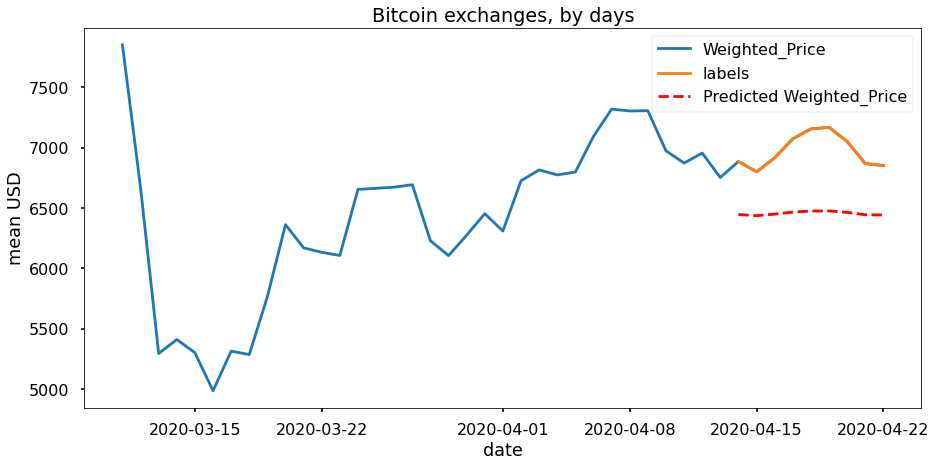

In [ ]:
training_set = train_3.values
training_set = np.reshape(training_set, (len(training_set), 1))
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler()
training_set = sc.fit_transform(training_set)
X_train = training_set[0:len(training_set)-1]
y_train = training_set[1:len(training_set)]

X_train = np.reshape(X_train, (len(X_train), 1, 1))


# Initialising the RNN
regressor = Sequential()

# Adding the input layer and the LSTM layer
regressor.add(LSTM(units = 4, activation = 'sigmoid', input_shape = (None, 1)))

# Adding the output layer
regressor.add(Dense(units = 1))

# Compiling the RNN
regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')

# Fitting the RNN to the Training set
regressor.fit(X_train, y_train, batch_size = 5, epochs = 100)

test_set = test_3.values
inputs = np.reshape(test_set, (len(test_set), 1))
inputs = sc.transform(inputs)
inputs = np.reshape(inputs, (len(inputs), 1, 1))
predicted_BTC_price = regressor.predict(inputs)
predicted_BTC_price = sc.inverse_transform(predicted_BTC_price)


frame = {'labels': test_3}
result = pd.DataFrame(frame)
result['predict'] = predicted_BTC_price
print(result)


plt.figure(figsize=(15,7))
df_3.plot()
result.labels.plot()
result.predict.plot(color='r', ls='--', label='Predicted Weighted_Price')
plt.legend()
plt.title('Bitcoin exchanges, by days')
plt.ylabel('mean USD')
plt.show()

# # Visualising the results
# plt.figure(figsize=(25,15), dpi=80, facecolor='w', edgecolor='k')
# ax = plt.gca()  
# plt.plot(test_set, color = 'red', label = 'Real BTC Price')
# plt.plot(predicted_BTC_price, color = 'blue', label = 'Predicted BTC Price')
# plt.title(' Тестовая выборка кризиса по причине коронавируса', fontsize=40)
# df_test = test_3.reset_index(drop=True)
# x=df_test.index
# labels = df_test['date']
# plt.xticks(x, labels, rotation = 'vertical')
# for tick in ax.xaxis.get_major_ticks():
#     tick.label1.set_fontsize(18)
# for tick in ax.yaxis.get_major_ticks():
#     tick.label1.set_fontsize(18)
# plt.xlabel('Time', fontsize=40)
# plt.ylabel('BTC Price(USD)', fontsize=40)
# plt.legend(loc=2, prop={'size': 25})
# plt.show()

In [ ]:
result['predict'] = result.predict.astype(np.float64)
result['labels'] = result.labels.astype(np.float64)

In [ ]:
#Calculate metrics
frame = {'labels': test_3}
result = pd.DataFrame(frame)
result['predict'] = predicted_BTC_price
result['predict'] = result.predict.astype(np.float64)
result['labels'] = result.labels.astype(np.float64)
print(result)


print('METRICS')
r2_score = r2_score(result['labels'],result['predict'])
print( f'r2_score {r2_score}')
mean_absolute_error = mean_absolute_error(result['labels'],result['predict'])
print(f'mean_absolute_error {mean_absolute_error}')
mean_squared_error = mean_squared_error(result['labels'],result['predict'], squared=False)
print(f'root mean_squared_error {mean_squared_error}')

                 labels      predict
date                                
2020-04-14  6884.686986  6445.037598
2020-04-15  6798.847554  6435.663086
2020-04-16  6914.666410  6448.290039
2020-04-17  7071.901788  6465.156738
2020-04-18  7153.927559  6473.826660
2020-04-19  7166.968470  6475.196777
2020-04-20  7050.526233  6462.882812
2020-04-21  6867.155476  6443.130371
2020-04-22  6850.600000  6441.326172
METRICS
r2_score -15.53749156169393
mean_absolute_error 518.7522468496677
root mean_squared_error 531.72188531698


In [ ]:
regressor.summary()